In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
family_heights = Table.read_table('data/family_heights.csv')
family_heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [4]:
heights = family_heights.relabeled(['midparentHeight', 'childHeight'], ['MidParent', 'Child']).select('MidParent', 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


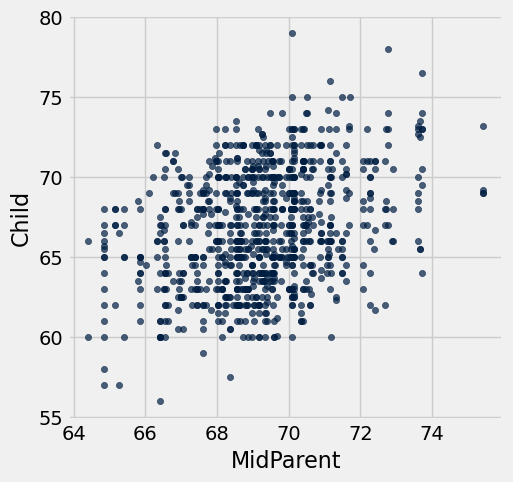

In [5]:
heights.scatter('MidParent')

In [6]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()     

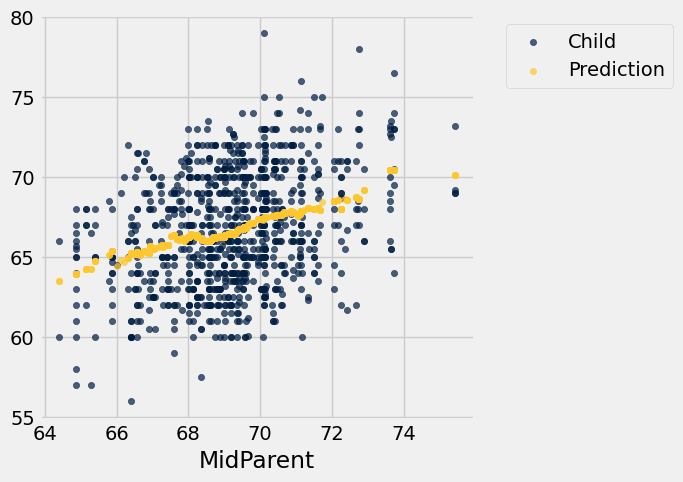

In [7]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

heights_with_predictions.scatter('MidParent')

In [8]:
hybrid = Table.read_table('data/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


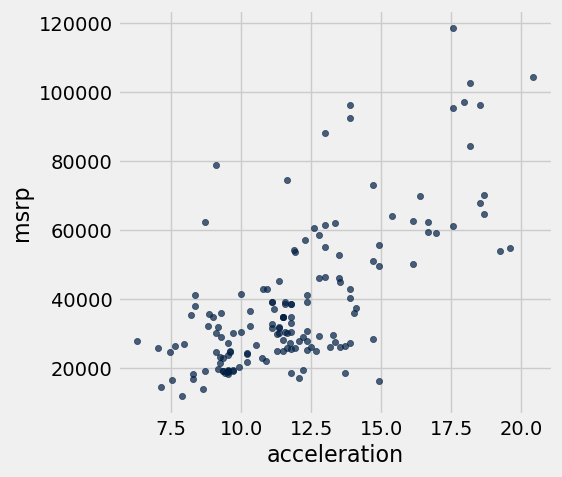

In [9]:
hybrid.scatter('acceleration', 'msrp')

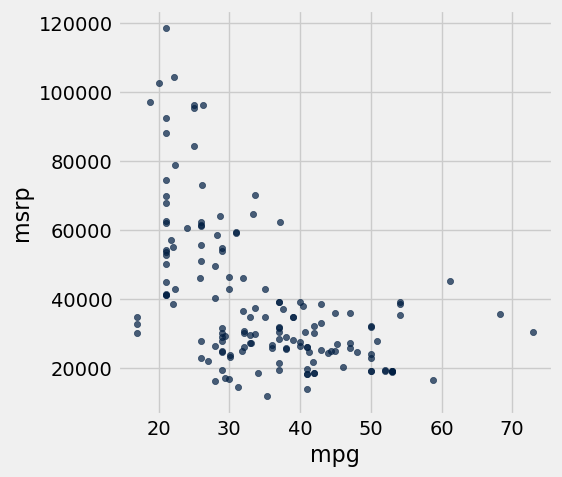

In [10]:
hybrid.scatter('mpg', 'msrp')

In [11]:
# ^ not linear!

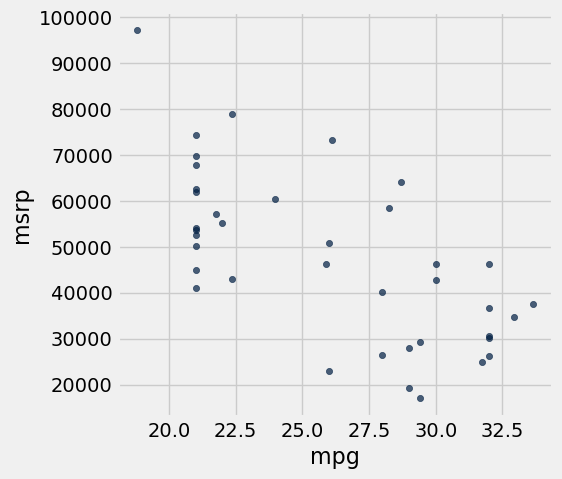

In [12]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

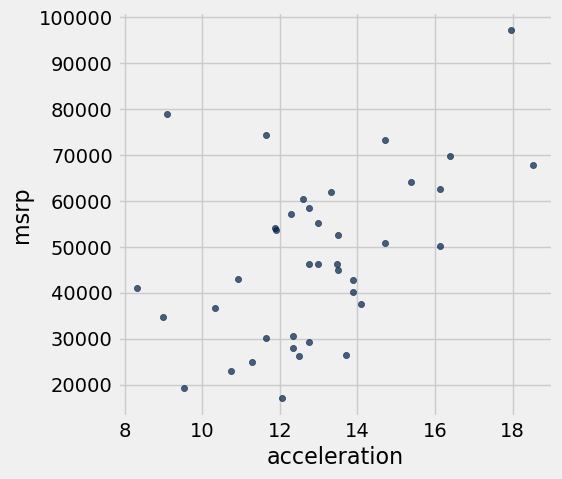

In [13]:
suv.scatter('acceleration', 'msrp')

In [14]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

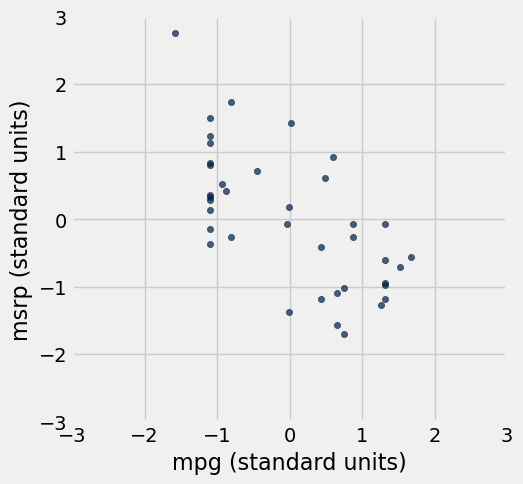

In [16]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

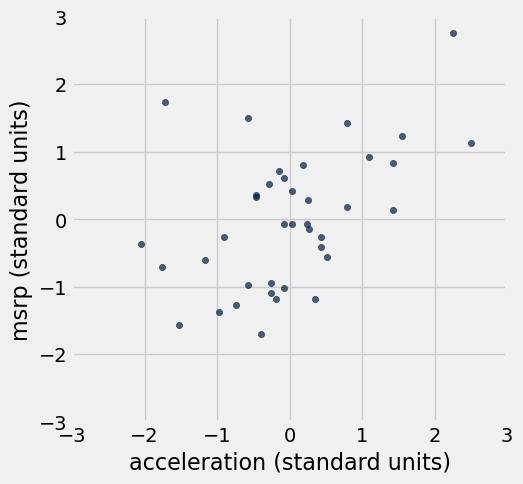

In [18]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

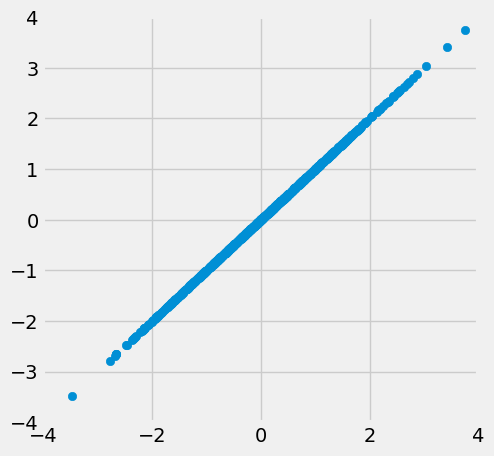

In [21]:
# don't worry about this code
def r_scatter(r):
    'Generate a scatter plot with a correlation approximately r'
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

r_scatter(1)

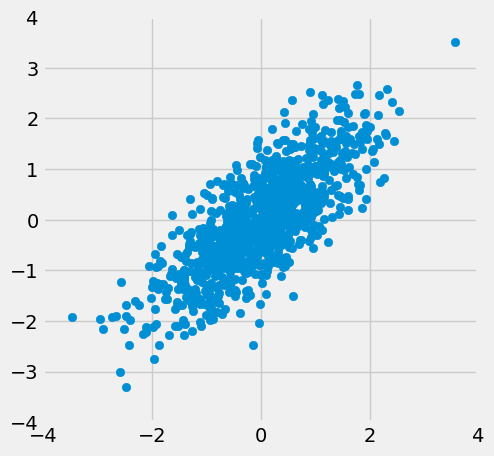

In [22]:
r_scatter(0.8)

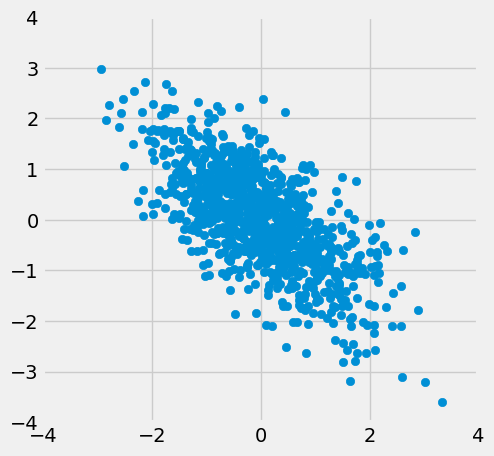

In [23]:
r_scatter(-0.7)

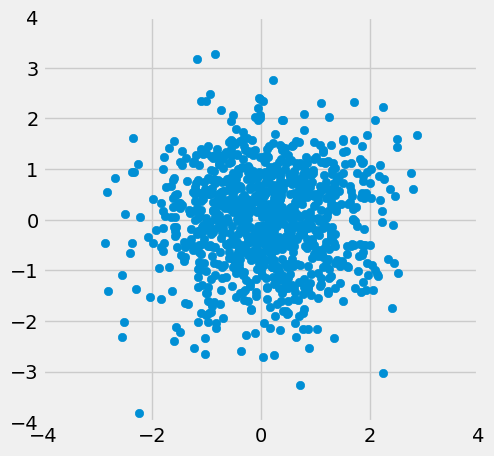

In [43]:
r_scatter(0)

In [25]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


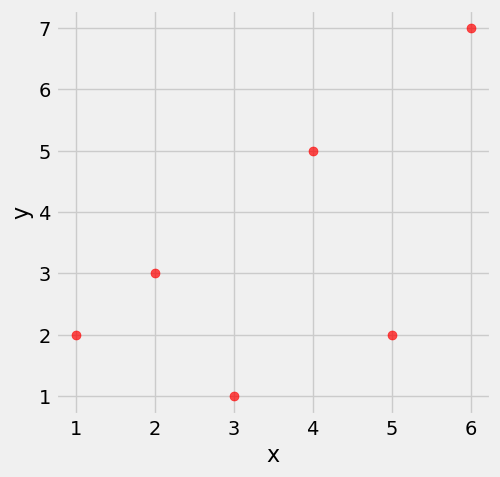

In [28]:
t.scatter(0, 1, s=42, color='red')

In [29]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [30]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [31]:
r = np.mean(t_product.column(4))
r

0.61741639718977093

In [32]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [33]:
correlation(t, 'x', 'y')

0.61741639718977093

In [34]:
correlation(t, 'y', 'x')

0.61741639718977093

In [35]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [36]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

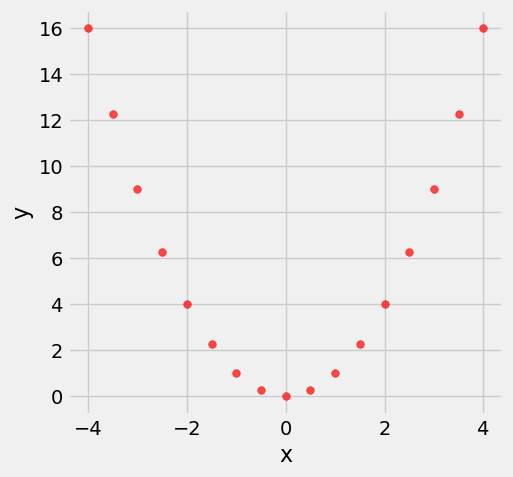

In [37]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [38]:
correlation(nonlinear, 'x', 'y')

0.0

0.0

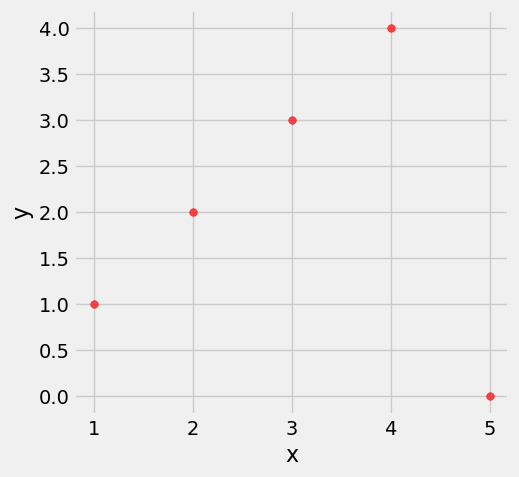

In [39]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')
correlation(outlier, 'x', 'y')

In [40]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


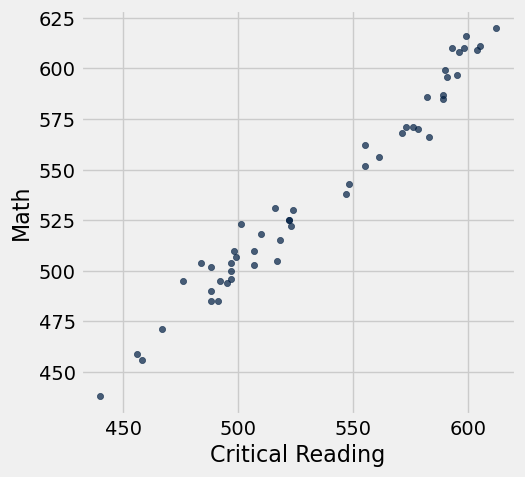

In [41]:
sat2014.scatter('Critical Reading', 'Math')

In [42]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341